# Hotdogs and Art
This week we worked with the production and optimization of datasets. This took the form of two assignments and the resulting AI.
## Hotdog and not-dogs
The first assignments of the day consisted of teaching an AI to identify hotdogs in images. For this purpose we needed a dataset for the AI to train on. Assuming to such dataset existed we set out to make our own using Microsoft Azures Bing search api. The following is a snippet of code demonstrating how this was achieved.

In [ ]:
food_types = 'hotdog', 'sandwich', 'pizza', 'burger'
path = Path('food')

In [ ]:
path.mkdir(exist_ok=True)
for o in food_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o}')
    download_images(dest, urls=results.attrgot('contentUrl'))

This code searches Bing for "Hotdogs" and "Sandwich", "Pizza" and "burger" and places the images in their respective folders.
The reasoning for searching to food instead of anything else was that other food would be the hardest for the AI to distinguish a hotdog from and thus anything else would be a cakewalk.

Initially we simply searched for "food -hotdog" but later Sandwich, Pizza and burger was added as we noticed the AI had a hard time distinguish these from hotdogs, so we wanted to give it more training on these in peticular.

In [32]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.336467,1.021466,0.342593,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.766608,0.379545,0.157407,00:27
1,0.551006,0.198412,0.074074,00:27
2,0.423204,0.138817,0.046296,00:27
3,0.365362,0.129856,0.046296,00:27


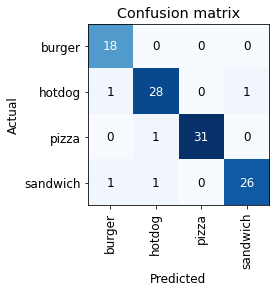

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

As seen above a few tuning runs we amanaged to achive relavtively good acuracy. Of course there are still things to ironed out, for instance runnning a picture of the earth by the AI it will be around 90% sure that it is a picture of a pizza.

## Art
it was brought to our attention that the Danish National Museum of art was in the possession the origin of except the title and year. They were asking for the public’s help in identifying the artist behind the piece. Thinking this was a perfect test for our AI skills.
As such, we found all the artists we could who lived during the period the painting was painted and downloaded images of their work.
Here we sadly ran into some issues, first it was hard to find good images of the paintings with sufficient detail, also the quantity of paintings from the individual artists was rather low, making for a bad dataset. The data we got needed heavy editing as a majority was their low quality or entirely irrelevant to the subject. 
It was also relevant to rethink how we where going to achieve a shared image size as stretching the images would reduce quality to the point where identifying a given artists particular style would be impossible. 